<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Final_Risk_Measurement_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initialization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

top_features = ['AB.C.alpha.q.T6', 'COH.A.delta.a.FP1.h.T3', 'COH.A.delta.b.FP2.m.T5']
data1 = pd.read_csv('/content/Sheet 1-numericBehaviorWithAgeOnly.csv')

Y = data1['specific_disorder']
X = data1[top_features]

Y = data1['specific_disorder'] == 5

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.664429
         Iterations 5


# OVERALL MODEL ACCURACY

In [ ]:
import random
random.seed(16)
np.random.seed(16)
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')

y = df['specific_disorder']

X = df.drop(columns=['specific_disorder'])
X = X[[col for col in X.columns if col in top_features]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc * 100)


[5 5 5 5 5 5 5 4 5 4 5 4 4 5 4 5 5 4 5 5 4 4 5 4 5 5 4 4 4 4 4 4 5 4 4 4 4
 4]
Logistic Regression model accuracy (in %): 52.63157894736842


# Muse Integration

In [ ]:
user_data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')


<ipython-input-46-68862582fc80>:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')


In [ ]:
row = 0

In [ ]:
#Delta TP9-AF8 coherence - corresponds to COH.A.delta.b.FP2.m.T5

from scipy import signal


channel_1 = user_data['Delta_TP9'].values
channel_2 = user_data['Delta_AF8'].values

channel_1 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
channel_2 = np.nan_to_num(channel_2, nan=np.nanmean(channel_2))

fs = 256
f, Cxy = signal.coherence(channel_1, channel_2, fs=fs, nperseg=1024)  # fs is sampling frequency

coherence_data = pd.DataFrame({'Frequency': f, 'Coherence DeltaTP9DeltaAF8': Cxy})

coherence_AF8_AF7 = coherence_data['Coherence DeltaTP9DeltaAF8'].mean()
coherence_AF8_AF7 *=100
print(coherence_AF8_AF7)




#Delta AF7 - TP9 coherence - corresponds to COH.A.delta.a.FP1.h.T3

from scipy import signal

data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')

channel_1 = data['Delta_AF8'].values
channel_2 = data['Delta_TP9'].values

channel_1 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
channel_2 = np.nan_to_num(channel_2, nan=np.nanmean(channel_2))

fs = 256
f, Cxy = signal.coherence(channel_1, channel_2, fs=fs, nperseg=1024)  # fs is sampling frequency

coherence_data = pd.DataFrame({'Frequency': f, 'Coherence DeltaAF8DeltaTP9': Cxy})

coherence_AF8_TP9 = coherence_data['Coherence DeltaAF8DeltaTP9'].mean()
coherence_AF8_TP9 *=100
print(coherence_AF8_TP9)

13.916182133081339
13.916182133081339


<ipython-input-48-b73faf25720f>:28: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Khushee mindMonitor_2024-11-15--21-52-00.csv')


In [ ]:
#COH.A.delta.b.FP2.m.T5
X = data1['COH.A.delta.b.FP2.m.T5']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

print(X.mean())


prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.b.FP2.m.T5': [coherence_AF8_TP9]})
print(result.summary())

pred = result.get_prediction(prediction_data)
print(pred)
print(result.summary())


print(pred.__dict__)
risk1 = -0.0246*(coherence_AF8_TP9) + 1.7527
print(risk1)
risk1_sigmoid = p = 1 / (1 + np.exp(-risk1))
print(risk1_sigmoid)

#Note: significant difference between equation-based prediction and pred.predicted_mean[0]

Optimization terminated successfully.
         Current function value: 0.688462
         Iterations 4
10.196074590425532
                           Logit Regression Results                           
Dep. Variable:      specific_disorder   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                0.006679
Time:                        07:22:22   Log-Likelihood:                -129.43
converged:                       True   LL-Null:                       -130.30
Covariance Type:            nonrobust   LLR p-value:                    0.1871
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1521      0.197      0.771      0.44

In [ ]:
print(pred.predicted)

[0.47836709]


In [ ]:
#COH.A.delta.a.FP1.h.T3
Y = data1['specific_disorder'] == 5
X = data1['COH.A.delta.a.FP1.h.T3']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()



prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.a.FP1.h.T3': [coherence_AF7_TP9]})

pred = result.get_prediction(prediction_data)


#risk2 = pred.predicted_mean[0]

risk2 =  -0.0040*(coherence_AF7_TP9) + 0.1324
print(risk2)
risk2_sigmoid = p = 1 / (1 + np.exp(-risk2))
print(risk2_sigmoid)

Optimization terminated successfully.
         Current function value: 0.686978
         Iterations 4
0.10899482670842953
0.5272217627561653


In [ ]:
#AB.C.alpha.q.T6
Y = data1['specific_disorder'] == 5
X = data1['AB.C.alpha.q.T6']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

Delta_TP10 = user_data['Delta_TP10'].values
Delta_TP10 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
Delta_TP10 = Delta_TP10.mean()

prediction_data = pd.DataFrame({'const': [1], 'AB.C.alpha.q.T6': [Delta_TP10]})

pred = result.get_prediction(prediction_data)


#risk3 = pred.predicted_mean[0]
risk3 = 0.0097*data['Delta_TP10'].mean() - 0.1531
print(risk3)
risk3_sigmoid = p = 1 / (1 + np.exp(-risk3))
print(risk3_sigmoid)

Optimization terminated successfully.
         Current function value: 0.687085
         Iterations 5
-0.14750334114591296
0.4631908792513958


#Result


In [ ]:


if risk3_sigmoid < 0.5:
  risk3_sigmoid = -1*(0.5 - risk3_sigmoid)

if risk2_sigmoid < 0.5:
  risk2_sigmoid = -1*(0.5 - risk2_sigmoid)

if risk1_sigmoid < 0.5:
  risk1_sigmoid = -1*(0.5 - risk1_sigmoid)


if risk3_sigmoid > 0.5:
  risk3_sigmoid = (risk3_sigmoid-0.5)
if risk2_sigmoid > 0.5:
  risk2_sigmoid = (risk2_sigmoid-0.5)
if risk1_sigmoid > 0.5:
  risk1_sigmoid = (risk1_sigmoid-0.5)


risk_sigmoid_total =  risk3_sigmoid + risk1_sigmoid
print(risk3_sigmoid)
print(risk2_sigmoid)
print(risk1_sigmoid)


output = "";
if risk_sigmoid_total<0:
  output = "You are " + str(risk_sigmoid_total*-100) +"% less likely to have IAD"
if risk_sigmoid_total>0:
  output = "You are " + str(risk_sigmoid_total*100) +"% more likely to have IAD"
if risk_sigmoid_total==0:
  output = "Prediction cannot be made."

print(output)
print(risk_sigmoid_total)

#equation based: 25.56406586142109% less likely
#prediction fuction based: 15.022754660005367% more likely


-0.03680912074860421
0.02722176275616528
0.3038230215687243
You are 26.70139008201201% more likely to have IAD
0.2670139008201201


#User Output

You are 26.70139008201201% more likely to have IAD


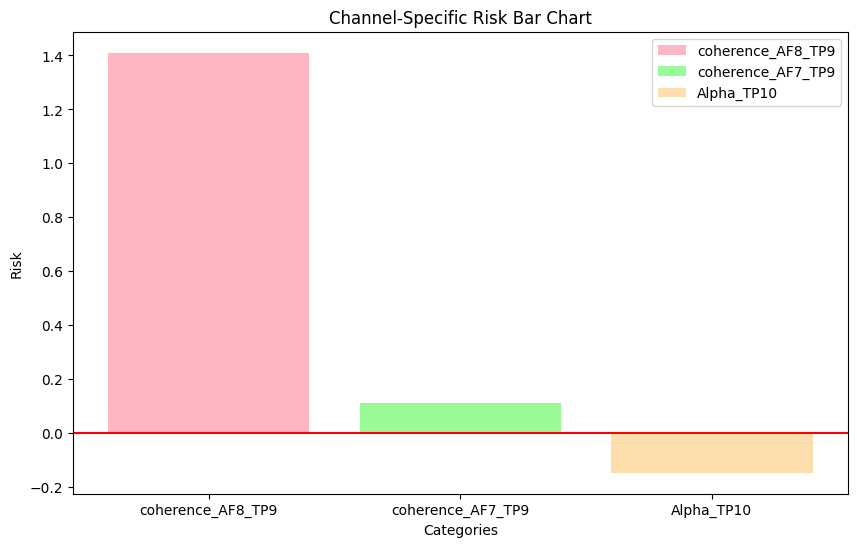

In [ ]:
print(output)


# Sample data
categories = ['coherence_AF8_TP9', 'coherence_AF7_TP9', 'Alpha_TP10']
values = [risk1, risk2, risk3]
colors = ['lightpink', 'palegreen', 'navajowhite', 'violet']


# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(categories, values, color=colors)
line = plt.axhline(y=0, color='r', linestyle='-', label='y=0')
plt.legend(bars, categories)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Risk')
plt.title('Channel-Specific Risk Bar Chart')

# Show the plot
plt.show()







Optimization terminated successfully.
         Current function value: 0.648650
         Iterations 5


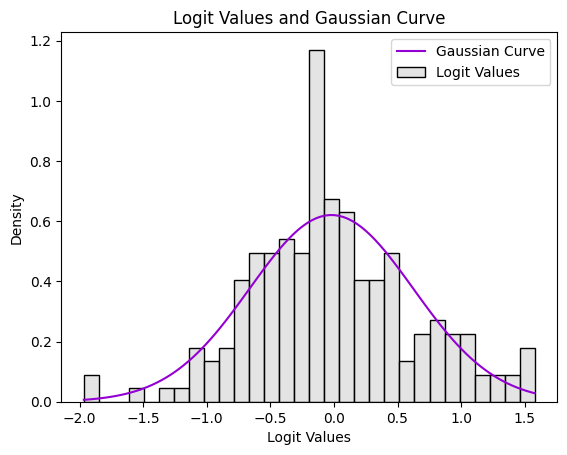

In [ ]:
#COH.A.delta.a.FP1.b.FP2
#COH.A.delta.a.FP1.b.FP2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm

X = data1[['COH.A.delta.a.FP1.b.FP2', 'COH.A.delta.f.F4.h.T3', 'AB.C.alpha.q.T6', 'AB.B.theta.c.F7']] # Changed tuple to a list

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()



prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.a.FP1.b.FP2': [coherence_AF8_AF7]})

logit_values = result.fittedvalues

x_vals = np.linspace(min(logit_values), max(logit_values), 100)

mu, std = np.mean(logit_values), np.std(logit_values)

gaussian_curve = norm.pdf(x_vals, mu, std)

sns.histplot(logit_values, kde=False, bins=30, color='gainsboro', stat='density', label="Logit Values")

plt.plot(x_vals, gaussian_curve, color='darkviolet', label='Gaussian Curve')

plt.xlabel('Logit Values')
plt.ylabel('Density')
plt.title('Logit Values and Gaussian Curve')
plt.legend()

plt.show()




Optimization terminated successfully.
         Current function value: 0.648650
         Iterations 5


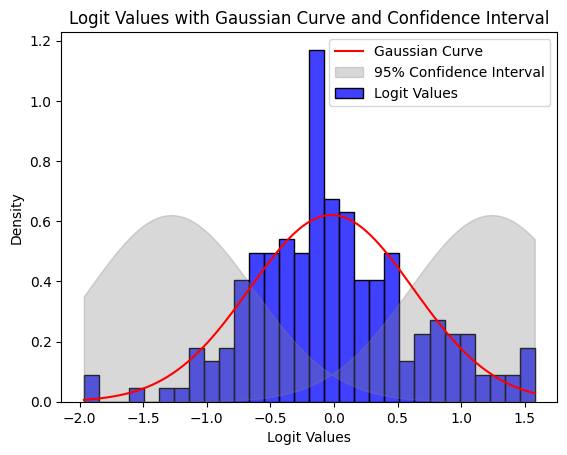

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm

X = data1[['COH.A.delta.a.FP1.b.FP2', 'COH.A.delta.f.F4.h.T3', 'AB.C.alpha.q.T6', 'AB.B.theta.c.F7']] # Changed tuple to a list

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 5 else 0)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

prediction_data = pd.DataFrame({'const': [1], 'COH.A.delta.a.FP1.b.FP2': [coherence_AF8_AF7]})

logit_values = result.fittedvalues

# Create a range of values for the x-axis (logit space)
x_vals = np.linspace(min(logit_values), max(logit_values), 100)

# Get the mean and standard deviation of the logit values
mu, std = np.mean(logit_values), np.std(logit_values)

# Calculate the Gaussian curve
gaussian_curve = norm.pdf(x_vals, mu, std)

# Plot the histogram of the logit values
sns.histplot(logit_values, kde=False, bins=30, color='blue', stat='density', label="Logit Values")

# Overlay the Gaussian curve
plt.plot(x_vals, gaussian_curve, color='red', label='Gaussian Curve')

# Plot the confidence intervals (shaded region)
plt.fill_between(x_vals, norm.pdf(x_vals, mu - 1.96*std, std), norm.pdf(x_vals, mu + 1.96*std, std),
                 color='gray', alpha=0.3, label="95% Confidence Interval")

# Add labels and title
plt.xlabel('Logit Values')
plt.ylabel('Density')
plt.title('Logit Values with Gaussian Curve and Confidence Interval')
plt.legend()

plt.show()